In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor


#pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

In [9]:
requests_9292 = pd.read_csv("PNB_Verzoeken.csv")

#requests_9292_mini = requests_9292.sample(frac=0.1)
### 9292 REQUESTS COLUMNS ### (LOG OF ALL REQUESTS MADE ON THE 9292 APP IN NOVEMBER 2019)
# QUESTION_TULP_ID : Unique Identifier
# Opvraag datum : Request Date
# Gewenste reis datum : Desired Travel Date
# Opvraag tijd uur : Query time Hours
# Gewenste vertrek tijd uur : Desried Departure Time Hours
# Halteclusternummer begin reis : Stop Cluster Number Start Journey
# Halteclusternummer eind reis : Stop Cluster Number End Journey
# Haltenaam begin reis : Stop Name Begin Journey
# Haltenaam eind reis : Stop Name End Journey


advices_9292 = pd.read_csv("PNB_Adviezen.csv")

bus_9292 = advices_9292[advices_9292['Modaliteit']=='Bus']

#advices_9292_mini = advices_9292.sample(frac=0.1)
### 9292 ADVICES COLUMNS ### (LOG OF ALL ADVICES GENERATED ON EACH OF THE PREVIOUS REQUESTS)
# QUESTION_TULP_ID : Unique Request Identifier
# Lag nummer : Lay number
# Lijn : Line
# Modaliteitsnummer : Modality Number
# Haltenummer van rit : Stop Number of Trip
# Haltenummer naar rit : Stop Number to Trip
# Reistijd lag : Travel Time 
# Startdatum lag : Start Date
# Starttijd lag : Start Time
# Haltenaam van rit : Stop Name of trip - Origin
# Haltenaam naar rit : Stop Name to trip - Destination
# Modaliteit : Modality
# Modaliteit Detail : Modality Detail



arriva_passenger_data = pd.read_csv("Bus_OD_data_WestOostBrabant_2019_11.csv",sep=';')
#arriva_passenger_data_mini = arriva_passenger_data.sample(frac=0.1)
### ARRIVA PASSENGER DATA COLUMNS ### (ACTUAL BUS CHECK-IN NUMBERS FOR ALL BUSES THROUGH NOVEMBER 2019)
# Exploitatiedatum : Operating Date
# Concessie : Concession
# Lijnnummer : Line Number
# Station Herkomst : Origin Station
# Station : Current Station
# Totaal : Total Occupancy


arriva_line_information = pd.read_csv("lijnnummer_koppeling.csv",sep=';')

### BUS LINE INFORMATION COLUMNS ### (EXTRA INFORMATION ON EACH BUS LINE NUMBER)
# Concessie : Concession
# InternLijnnummer : Internal Line Number (Used by arriva)
# PublieksLijnnummer : Public Line Number (Visible to the public and on 9292 app)
# Omschrijving : Description
# Type : Bus Line Type


arriva_haltes = pd.read_csv("Arriva_Haltes.csv",sep=';')

### BUS STOP LOCATIONS ### (EXTRA INFORMATION ON EACH BUS STOP)

In [7]:
arriva_passenger_data

In [10]:
##del arriva_passenger_data['Exploitatiedatum']
#arriva_passenger_data.insert(loc=1,column='Day',value=pd.Series(pd.DatetimeIndex(arriva_passenger_data['Exploitatiedatum'])).dt.day_name())

#arriva_passenger_data.index.dt.day_name 
#arriva_passenger_data.insert(loc=1,column='Day_num',value=pd.Series(pd.DatetimeIndex(arriva_passenger_data['Exploitatiedatum'])).dt.dayofweek)
#arriva_passenger_data['Date'] = ['0'+arriva_passenger_data['Exploitatiedatum'][index] if len(arriva_passenger_data['Exploitatiedatum'][index])<10 else arriva_passenger_data['Exploitatiedatum'][index] for index in arriva_passenger_data.index]
# arriva_passenger_data.insert(loc=2,column='Source Station',value=pd.Series([arriva_haltes[arriva_haltes['Arriva_FARESTOPSHORTDESCRIPTION']==elem][['CHB_Haltenaam']].values for elem in arriva_passenger_data['Station Herkomst']]))
# arriva_passenger_data.insert(loc=3,column='Destination Station',value=pd.Series([arriva_haltes[arriva_haltes['Arriva_FARESTOPSHORTDESCRIPTION']==elem][['CHB_Haltenaam']].values for elem in arriva_passenger_data['Station']]))

# arriva_cleaned = arriva_passenger_data[['Day','Lijnnummer','Exploitatiedatum','Source Station','Destination Station','Totaal']]
# arriva_cleaned['Source Station']=[str(elem) for elem in arriva_cleaned['Source Station']]
# arriva_cleaned['Source Station']=[elem[3:-3] for elem in arriva_cleaned['Source Station']]
# arriva_cleaned['Destination Station']=[str(elem) for elem in arriva_cleaned['Destination Station']]
# arriva_cleaned['Destination Station']=[elem[3:-3] for elem in arriva_cleaned['Destination Station']]
# arriva_cleaned.replace("",np.nan,inplace=True)
# arriva_cleaned = arriva_cleaned.dropna()

# arriva_cleaned.to_pickle('arriva_cleaned_final')

# cleaned_9292 = pd.read_csv('C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\9292_updated.csv')
# cleaned_9292.insert(loc=1,column='Day',value=pd.Series(pd.DatetimeIndex(cleaned_9292['Startdatum_lag'])).dt.day_name())



In [40]:
line_4_dict = {'Breda, Hovenierstraat':0,
                'Breda, Dreef':1,
                'Breda, Nieuwe Heilaarstraat':2,
                'Breda, Woonboulevard':3,
                'Breda, Liesboslaan':4,
                'Breda, Ambachtenlaan':5,
                'Breda, Doelen':6,
                'Breda, Hovenierstraat':7,
                'Breda, Burgemeester Sutoriusstraat':8,
                'Breda, Flierstraat':9,
                'Breda, Mgr.Nolensplein':10,
                'Breda, Heuvelbrink':11,
                'Breda, Dr. Struyckenplein':12,
                'Breda, Bontekoestraat':13,
                'Breda, Amphia Zkh. Langendijk':14,
                'Breda, Langendijk':15,
                'Breda, Graaf Hendrik III Laan':16,
                'Breda, Grote Spie':17,
                'Breda, Irenestraat':18,
                'Breda, Markendaalseweg':19,
                'Breda, Centrum':20,
                'Breda, Vlaszak':21,
                'Breda, Centraal Station':22,
                'Breda, Belcrumweg':23,
                'Breda, Konijnenberg':24,
                'Breda, Spinveld':25,
                'Breda, Donk':26,
                'Breda, Heienlangdonk':27,
                'Breda, Somerweide':28,
                'Breda, Noortberghmoeren':29,
                'Breda, Cannaertserf':30,
                'Breda, Komoord':31,
                'Breda, Dwarsdijk':32,
                'Breda, Emerparklaan':33,
                'Breda, Heksenwiellaan':34
                }

line_4_dict = {key.lower():value for (key,value) in line_4_dict.items()}

In [ ]:
cleaned_9292 = pd.read_pickle('final_9292')
arriva_cleaned = pd.read_picle('final_arriva')

In [49]:

# select line 4 and modality 2
app_line_4_df = cleaned_9292[(cleaned_9292['Lijn'] == 4) &(cleaned_9292['Modaliteitsnummer']==2)]

# remove spaces from end
app_line_4_df['Haltenaam_van_rit'] = [elem.rstrip() for elem in app_line_4_df['Haltenaam_van_rit'] ]
app_line_4_df['Haltenaam_naar_rit'] = [elem.rstrip() for elem in app_line_4_df['Haltenaam_naar_rit']]

# convert to lower case
app_line_4_df['Haltenaam_naar_rit'] = [elem.lower() for elem in app_line_4_df['Haltenaam_naar_rit']]
app_line_4_df['Haltenaam_van_rit'] = [elem.lower() for elem in app_line_4_df['Haltenaam_van_rit']]

# replace bad station name
app_line_4_df['Haltenaam_van_rit']=[elem.replace('breda, station','breda, centraal station') for elem in app_line_4_df['Haltenaam_van_rit']]
app_line_4_df['Haltenaam_naar_rit']=[elem.replace('breda, station','breda, centraal station') for elem in app_line_4_df['Haltenaam_naar_rit']]

#create stop number columns
app_line_4_df['Haltenaam_van_rit_number'] = [line_4_dict.get(loc) for loc in app_line_4_df[(app_line_4_df['Lijn'] == 4)]['Haltenaam_van_rit']]
app_line_4_df['Haltenaam_naar_rit_number'] = [line_4_dict.get(loc) for loc in app_line_4_df[(app_line_4_df['Lijn'] == 4)]['Haltenaam_naar_rit']]

# select november
app_line_4_df = app_line_4_df[[app_line_4_df['Startdatum_lag'][index][5:-3]=='11' for index in app_line_4_df.index]]

app_line_4_df.dropna(inplace=True)

In [50]:
# select line 4
arriva_line_4_df = arriva_cleaned[(arriva_cleaned['Lijnnummer'] == 4)]

# Make source and dest lower case
arriva_line_4_df['Source Station'] = [elem.lower() for elem in arriva_line_4_df['Source Station']]
arriva_line_4_df['Destination Station'] = [elem.lower() for elem in arriva_line_4_df['Destination Station']]

# Add source and dest number columns
arriva_line_4_df['Source Station Number'] = [line_4_dict.get(loc) for loc in arriva_line_4_df[(arriva_line_4_df['Lijnnummer'] == 4)]['Source Station']]
arriva_line_4_df['Destination Station Number'] = [line_4_dict.get(loc) for loc in arriva_line_4_df[(arriva_line_4_df['Lijnnummer'] == 4)]['Destination Station']]

arriva_line_4_df.dropna(inplace=True)

In [43]:
# For buses going in one direction
original_direction = arriva_line_4_df[arriva_line_4_df['Source Station Number'] < arriva_line_4_df['Destination Station Number']]

# For buses going in opposite direction
reverse_direction = arriva_line_4_df[arriva_line_4_df['Source Station Number'] > arriva_line_4_df['Destination Station Number']]


og_arriva_occupancy_line_4_df = pd.DataFrame(columns = ['Exploitatiedatum','Station','Occupancy'])
rev_arriva_occupancy_line_4_df = pd.DataFrame(columns = ['Exploitatiedatum','Station','Occupancy'])


for date in arriva_line_4_df['Exploitatiedatum'].unique():
    for stop in sorted(arriva_line_4_df['Source Station Number'].unique()):
        occupancy = original_direction[(original_direction['Exploitatiedatum'] == date)&(original_direction['Source Station Number'] <= stop)]['Totaal'].sum() - original_direction[(original_direction['Exploitatiedatum'] == date)&  (original_direction['Destination Station Number'] < stop)]['Totaal'].sum()
        og_arriva_occupancy_line_4_df = og_arriva_occupancy_line_4_df.append({'Exploitatiedatum':date, 'Station':stop, 'Occupancy':occupancy},ignore_index=True)

        #print([date, stop, occupancy])

for date in arriva_line_4_df['Exploitatiedatum'].unique():
    for stop in sorted(arriva_line_4_df['Source Station Number'].unique()):
        occupancy = reverse_direction[(reverse_direction['Exploitatiedatum'] == date)&(reverse_direction['Source Station Number'] <= stop)]['Totaal'].sum() - reverse_direction[(reverse_direction['Exploitatiedatum'] == date)&  (reverse_direction['Destination Station Number'] < stop)]['Totaal'].sum()
        rev_arriva_occupancy_line_4_df = rev_arriva_occupancy_line_4_df.append({'Exploitatiedatum':date, 'Station':stop, 'Occupancy':occupancy},ignore_index=True)
        #print([date, stop, occupancy])

In [55]:
# For buses going in one direction
original_direction = app_line_4_df[app_line_4_df['Haltenaam_van_rit_number'] < app_line_4_df['Haltenaam_naar_rit_number']]

# For buses going in opposite direction
reverse_direction = app_line_4_df[app_line_4_df['Haltenaam_van_rit_number'] > app_line_4_df['Haltenaam_naar_rit_number']]

og_app_occupancy_line_4_df = pd.DataFrame(columns = ['Day','Exploitatiedatum','Station','Occupancy'])
rev_app_occupancy_line_4_df = pd.DataFrame(columns = ['Day','Exploitatiedatum','Station','Occupancy'])

for date in app_line_4_df['Startdatum_lag'].unique(): 
    for stop in sorted(line_4_dict.values()):
        for day in app_line_4_df['Day'].unique():
        #sorted(app_line_4_df['Haltenaam_van_rit_number'].unique()):
            occupancy = original_direction[(original_direction['Startdatum_lag'] == date)&(original_direction['Haltenaam_van_rit_number'] <= stop)]['QUESTION_TULP_ID'].sum() - original_direction[(original_direction['Startdatum_lag'] == date) & (original_direction['Haltenaam_naar_rit_number'] < stop)]['QUESTION_TULP_ID'].sum()
            og_app_occupancy_line_4_df = og_app_occupancy_line_4_df.append({'Day':day,'Exploitatiedatum':date, 'Station':stop, 'Occupancy':occupancy},ignore_index=True)
            #print([date, stop, occupancy])

for date in arriva_line_4_df['Exploitatiedatum'].unique():
    for stop in sorted(line_4_dict.values()):
        for day in app_line_4_df['Day'].unique():
            occupancy = reverse_direction[(reverse_direction['Startdatum_lag'] == date)&(reverse_direction['Haltenaam_van_rit_number'] <= stop)]['QUESTION_TULP_ID'].sum() - reverse_direction[(reverse_direction['Startdatum_lag'] == date)&  (reverse_direction['Haltenaam_naar_rit_number'] < stop)]['QUESTION_TULP_ID'].sum()
            rev_app_occupancy_line_4_df = rev_app_occupancy_line_4_df.append({'Day':day,'Exploitatiedatum':date, 'Station':stop, 'Occupancy':occupancy},ignore_index=True)
            #print([date, stop, occupancy])

In [56]:
og_app_occupancy_line_4_df['Exploitatiedatum']=["-".join(og_app_occupancy_line_4_df['Exploitatiedatum'][index].split('-')[::-1]) for index in og_app_occupancy_line_4_df.index]
rev_app_occupancy_line_4_df['Exploitatiedatum']=["-".join(rev_app_occupancy_line_4_df['Exploitatiedatum'][index].split('-')[::-1]) for index in rev_app_occupancy_line_4_df.index]

In [22]:
def get_x_y(direction = 'forward'):
    x = list()
    y = list()

    if direction == 'forward':
        for date in og_arriva_occupancy_line_4_df['Exploitatiedatum'].unique():
            for stop in og_arriva_occupancy_line_4_df['Station'].unique():
                y.append(list(og_arriva_occupancy_line_4_df[(og_arriva_occupancy_line_4_df['Exploitatiedatum']==date) & (og_arriva_occupancy_line_4_df['Station']==stop)]['Occupancy'].values))
                x.append(list(og_app_occupancy_line_4_df[(og_app_occupancy_line_4_df['Exploitatiedatum']==date) & (og_app_occupancy_line_4_df['Station']==stop)]['Occupancy'].values))

        zipped_xy_values = [(elem[0],elem[1]) for elem in zip(x,y) if len(elem[0]) > 0 and len(elem[1]) > 0]

        x = np.array([elem[0][0] for elem in zipped_xy_values])
        y = np.array([elem[1][0] for elem in zipped_xy_values])

    if direction == 'reverse':
        for date in rev_arriva_occupancy_line_4_df['Exploitatiedatum'].unique():
            for stop in rev_arriva_occupancy_line_4_df['Station'].unique():
                y.append(list(rev_arriva_occupancy_line_4_df[(rev_arriva_occupancy_line_4_df['Exploitatiedatum']==date) & (rev_arriva_occupancy_line_4_df['Station']==stop)]['Occupancy'].values))
                x.append(list(rev_app_occupancy_line_4_df[(rev_app_occupancy_line_4_df['Exploitatiedatum']==date) & (rev_app_occupancy_line_4_df['Station']==stop)]['Occupancy'].values))

        zipped_xy_values = [(elem[0],elem[1]) for elem in zip(x,y) if len(elem[0]) > 0 and len(elem[1]) > 0]

        x = np.array([elem[0][0] for elem in zipped_xy_values])
        y = np.array([elem[1][0] for elem in zipped_xy_values])
        

    return x,y

In [24]:
def regression_plot(x,y,logy=False):
    fig, ax = plt.subplots()    
    ax.plot(x,y, linewidth=0, marker='v', label='Data points')
        
    #model_rbf_svr = SVR(kernel='rbf', C=1, gamma=0.001, epsilon=.1).fit(x.reshape(-1,1),y)

    #ax.plot(x, model_rbf_svr.predict(x.reshape(-1,1)),label='RBF SVR')


    model_mlp = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant',                   learning_rate_init=0.1, power_t=0.5, max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,                       nesterovs_momentum=True, early_stopping=False, validation_fraction=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000).fit(x.reshape(-1,1),y)

    ax.plot(x, model_mlp.predict(x.reshape(-1,1)) ,label='Multi Layer Perceptron')


    model_linear = LinearRegression().fit(x.reshape(-1,1),y)

    ax.plot(x, model_linear.predict(x.reshape(-1,1)) ,label='Linear Regressor')


    ax.set_xlabel('9292 Request Frequency')
    ax.set_ylabel('Arriva Occupancy')
    if logy:
        ax.set_yscale('log')
    ax.legend(facecolor='white')

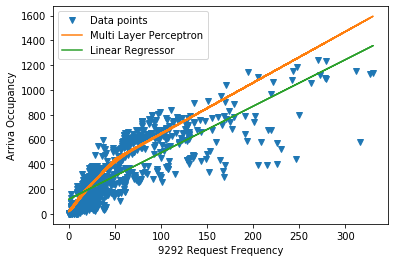

In [25]:
x,y = get_x_y()
regression_plot(x,y,logy=False)

In [26]:
model_linear = LinearRegression().fit(x.reshape(-1,1),y)
model_linear.predict(req_count.reshape(1,-1))


In [122]:
cleaned_9292.to_pickle('final_9292')

In [123]:
arriva_cleaned.to_pickle('final_arriva')

In [118]:
# og_arriva_occupancy_line_4_df


# for one request of 9292:
#     (Day,Date,Hour,Source,Destination)
#     For the intended trip

# for the requested day:
#         calculate the ratio of req/total req for the requested hour (this data will only have samples from the same day)
#         model.predict()*calculated ratio for the requested hour
        

#day,date,hour,source,destination
def get_occupancy_prediction(day,hour,source,destination):

    Source_num = line_4_dict[source]
    Dest_num = line_4_dict[destination]

    if Source_num < Dest_num:
        df = og_app_occupancy_line_4_df
    else:
        df = rev_app_occupancy_line_4_df

    res_df = df[(df['Station']>=Source_num)&(df['Exploitatiedatum']==date)&(df['Station']<Dest_num)&(df['Day']==day)]

    return np.mean(model_linear.predict(np.array([res_df['Occupancy'][index] for index in res_df.index]).reshape(-1,1)))    * cleaned_9292[(cleaned_9292['Lijn']==4)&(cleaned_9292['Day']==day)&(cleaned_9292['Modaliteitsnummer']==2)&(cleaned_9292['Starttijd_lag']==hour)].groupby('Startdatum_lag').sum()['QUESTION_TULP_ID'].mean()/cleaned_9292[(cleaned_9292['Lijn']==4)&(cleaned_9292['Day']==day)&(cleaned_9292['Modaliteitsnummer']==2)].groupby('Startdatum_lag').sum()['QUESTION_TULP_ID'].mean()


def get_hub_location(day,hour,source,destination):



In [119]:
get_prediction('Monday',0,'breda, nieuwe heilaarstraat','breda, komoord')

3.7563678068145054

In [458]:
#returns regressor pipeline
def regressor_pipeline(estimator,categorical_features=None,numerical_features =None):
    
    # Creating a pipeline with one-hot-encoder for categorical data 
    categoric_transformer = make_pipeline(OneHotEncoder(sparse=False,handle_unknown='ignore'))

    # Creating a pipeline with mean imputer for numerical data 
    numeric_transformer =  make_pipeline(StandardScaler())  
    
    # Combining both pipelines such that each pipeline works on the columns it was meant for
    preprocessor = make_column_transformer((categoric_transformer,categorical_features),
                                           (numeric_transformer,numerical_features)
     )

    # Return the complete pipeline containing preprocessing-piepline and the estimator/classifier
    return Pipeline(steps = [('prep',StandardScaler()),('est',estimator)])


def regression_scores(models):
    keys = list()

    if 'linear_regressor' in models:
        keys.append('linear_regressor')
    if 'mlp_regressor' in models:
        keys.append('mlp_regressor')
    if 'svm_regressor' in models:
        keys.append('svm_regressor')
    if 'rf_regressor' in models:
        keys.append('rf_regressor')

    
    all_models = {'linear_regressor':  LinearRegression().fit(x.reshape(-1,1),y),
                    'mlp_regressor':MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant',                   learning_rate_init=0.1, power_t=0.5, max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,                       nesterovs_momentum=True, early_stopping=False, validation_fraction=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000).fit(x.reshape(-1,1),y),
                    'rf_regressor': RandomForestRegressor(n_estimators=500,random_state=1).fit(x.reshape(-1,1), y)
                    #   'linear_regressor': LinearRegression(n_jobs=-1).fit(partitions[s][x].values, [partitions[s]['Total Funding Amount Currency (in USD)'][element] for element in partitions[s].index] )
                    }
    models = { key: all_models[key] for key in keys }
          
    results = dict() 
    # { 'linear_regressor':[],
    #                     'mlp_regressor' : []
    #                         #'svm_regressor':[],
    #                     # 'linear_regressor':[]  
    #                 
    # }

    

    for (model_name,model_pipe) in models.items():
        for metric in ['r2']: 
            results[model_name]=np.mean(cross_validate(model_pipe,x.reshape(-1,1), y, scoring=metric,cv=ShuffleSplit(n_splits=10,random_state=1),                                           return_train_score=False)['test_score'])

    res = pd.DataFrame(data=results,index=pd.Series([0]))
    res['metrics'] = pd.Series(['r2'])

    return res

In [448]:
regression_scores(['mlp_regressor','rf_regressor','linear_regressor'])

,linear_regressor,mlp_regressor,rf_regressor,metrics
0,0.668013,0.58447,0.66355,r2


In [459]:
regressor_pipeline(MLPRegressor())

Pipeline(steps=[('prep', StandardScaler()), ('est', MLPRegressor())])

In [460]:
regressor_pipeline(RandomForestRegressor())

Pipeline(steps=[('prep', StandardScaler()), ('est', RandomForestRegressor())])

In [2]:
from sklearn.model_selection import GridSearchCV

mlp_pipe_params = {'est__hidden_layer_sizes':[(300,200,100,1),(100,50,1),(1000,500,1),(10,1)],
                    #'est__activation':['identity','logistic','tanh','relu'],
                    #'est__solver':['lbfgs', 'sgd', 'adam'],
                    #'est__alpha': np.logspace(-4,4),
                    #'est__learning_rate':['constant', 'invscaling', 'adaptive'],
                    #'est__power_t': np.logspace(-4,4),
                    #'est__momentum':np.linspace(0,1,num=20),
                    #'est__epsilon':np.logspace(-9,-7)
                    }

grid_search = GridSearchCV(regressor_pipeline(MLPRegressor()),mlp_pipe_params,cv=ShuffleSplit(n_splits=5,random_state=1))
grid_search.fit(x,y)
#grid_search.best_score_
#grid_search.best_params_

NameError: name 'regressor_pipeline' is not defined

In [29]:
Occupancy at each station i for each date: #for each lijnnummer  
(how many people have checked-in before i) - (how many people have checked-out before i)


1) select all combinations where from < to

2) out of 1 select all where from < i  
3) out of 1 select all where to < i
4) sum(totals of 2) - sum(totals of 3) 

In [49]:
stops = ["'s-Hertogenbosch, Onderwijsboulevard",
"'S-Hertogenbosch, Centraal Station",
"Tilburg, Centraal Station",
"Tilburg, Stappegoor/IJsbaan",
"Breda, Centraal Station",
"Breda, Hogeschoollaan",
"Breda, Biesdonkweg"]


In [16]:
import matplotlib.pyplot as plt


In [71]:
source = "'s-Hertogenbosch, Onderwijsboulevard"
destination = "'S-Hertogenbosch, Centraal Station"
trip_data = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)]


In [90]:

def plot_trip_byweekday(source,destination):

    trip_data = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)]
    #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination)    
    agg_trip = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)].groupby(['Day_num']).mean()
    agg_trip = agg_trip.reset_index()


    plt.scatter([elem for elem in trip_data['Day_num'].astype(int).values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b',label='Check-ins')

    plt.plot([elem for elem in agg_trip['Day_num'].astype(int).values],[elem for elem in agg_trip['Totaal'].astype(int).values],c='r',label='Mean')
    plt.xticks(agg_trip['Day_num'],[elem for elem in ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']])
    plt.xlabel('Day')
    plt.ylabel('Trip Occupancy')
    plt.legend(loc='best')
    plt.title(source+' to '+destination)



def plot_trip_bydate(source,destination):

    trip_data = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)]
    #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination
    agg_trip = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)].groupby(['Exploitatiedatum']).mean()
    agg_trip = agg_trip.reset_index()

    plt.figure(num=None, figsize=(30, 6), dpi=100, facecolor='w', edgecolor='k')
    #plt.scatter([elem for elem in trip_data['Exploitatiedatum'].values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b')
    plt.bar([elem for elem in agg_trip['Exploitatiedatum'].values],[elem for elem in agg_trip['Totaal'].astype(int).values],label='Mean Arriva Occupancy')

    plt.xticks(agg_trip['Exploitatiedatum'],[elem[:4] for elem in agg_trip['Exploitatiedatum']])
    plt.xlabel('Date')
    plt.ylabel('Occupancy')

    plt.legend(loc='best')
    plt.title(source+' to '+destination)    
    

(None, None)

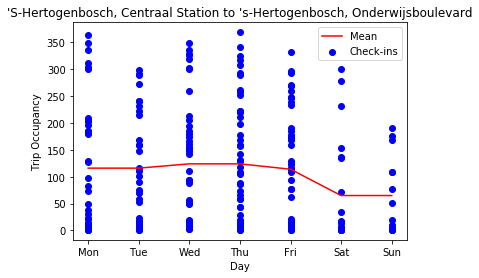

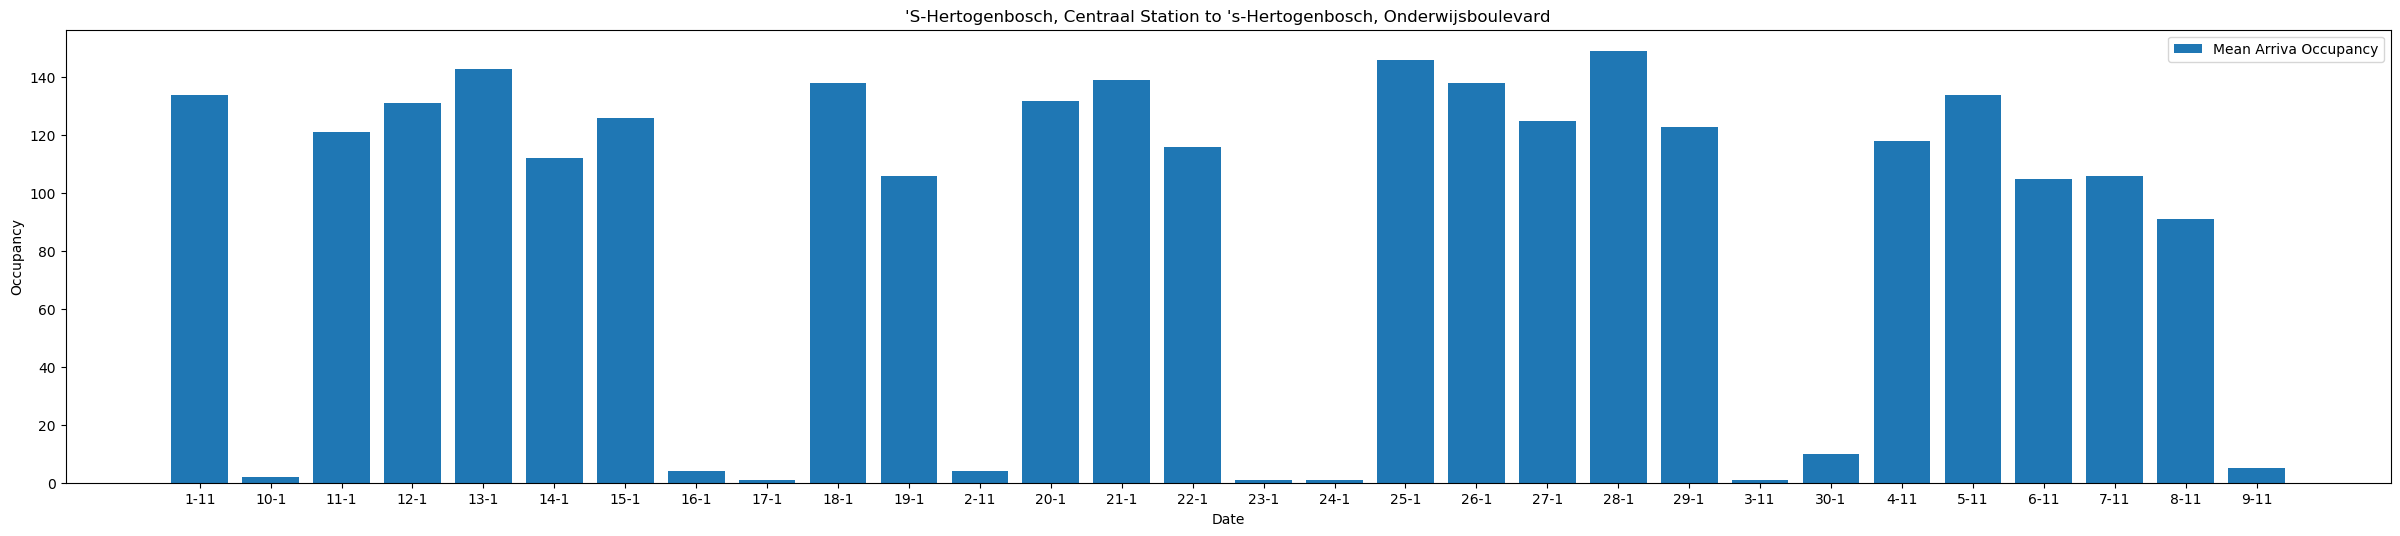

In [91]:
plot_trip_byweekday(stops[1],stops[0]),plot_trip_bydate(stops[1],stops[0])

(None, None)

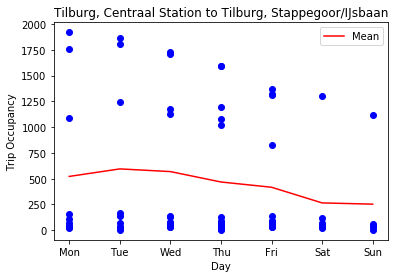

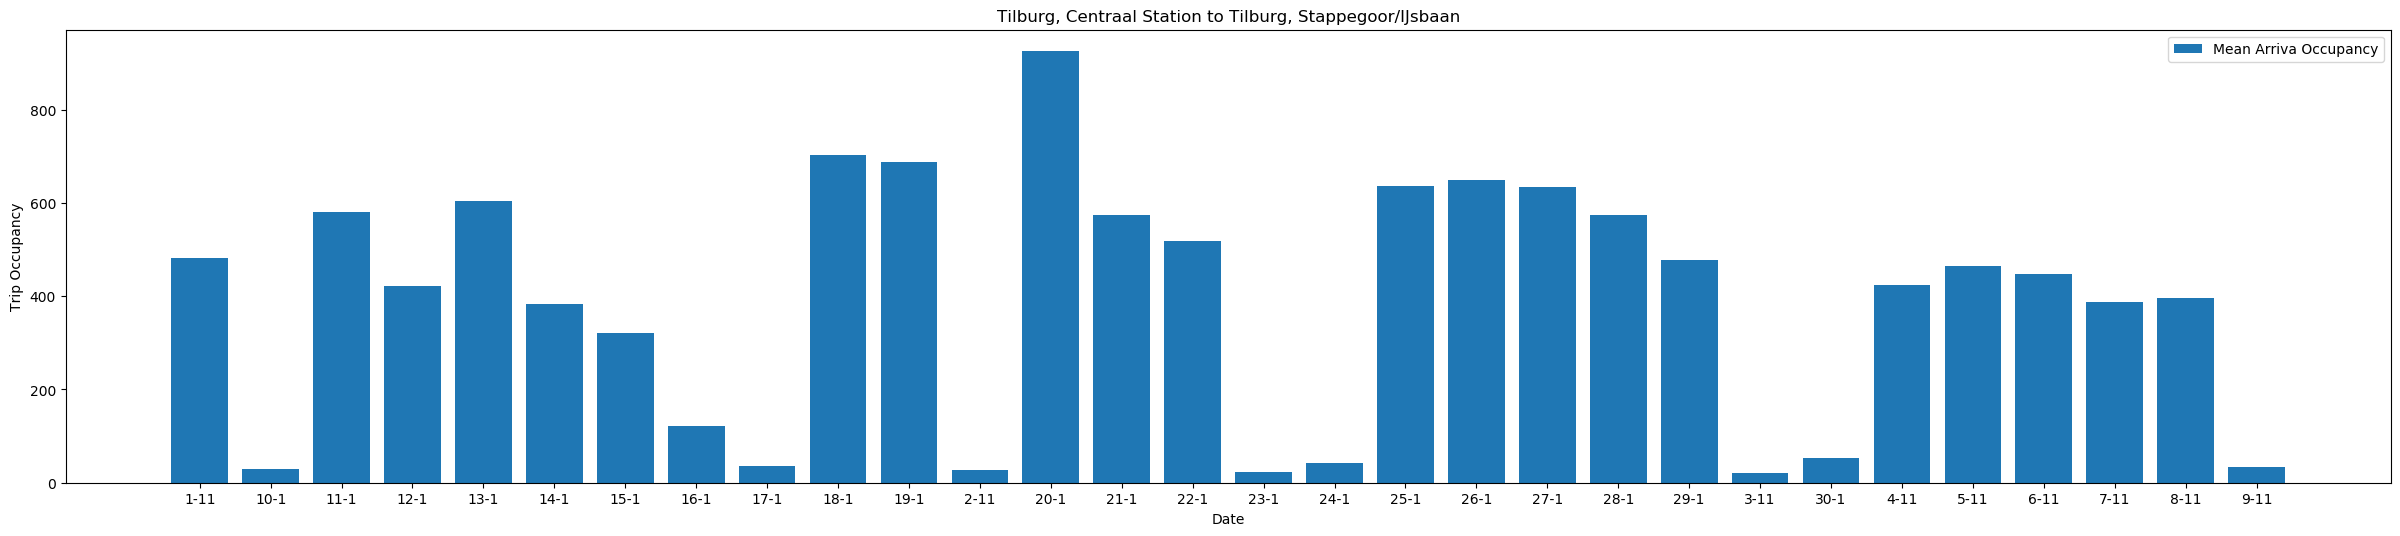

In [76]:
plot_trip_byweekday(stops[2],stops[3]),plot_trip_bydate(stops[2],stops[3])

(None, None)

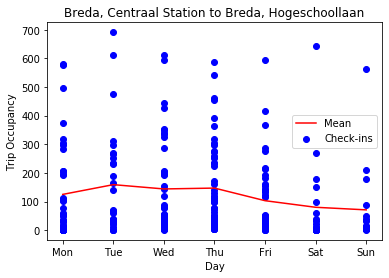

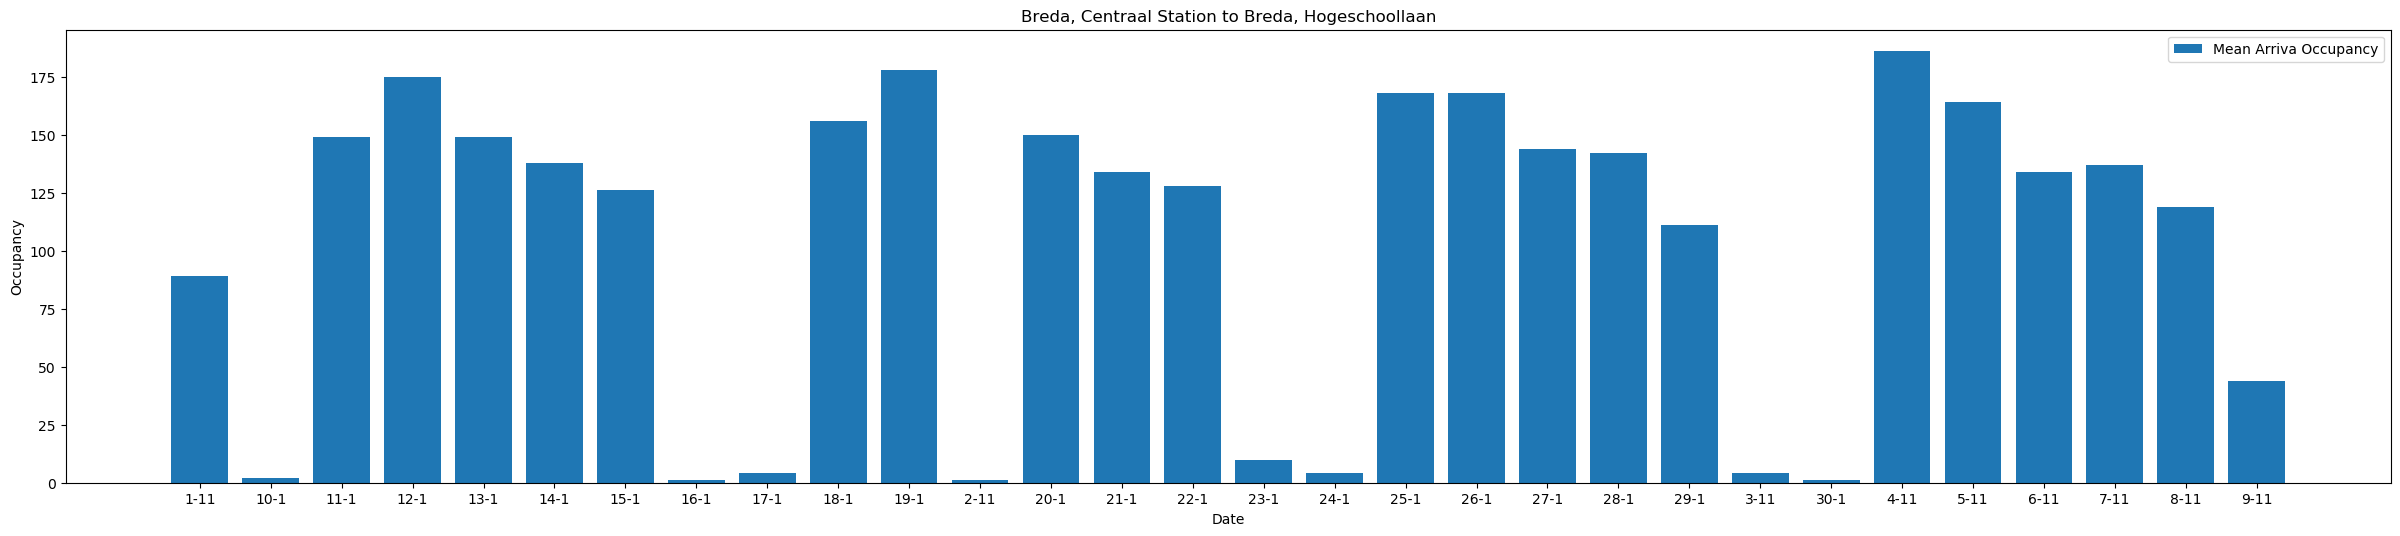

In [92]:
plot_trip_byweekday(stops[4],stops[5]),plot_trip_bydate(stops[4],stops[5])

(None, None)

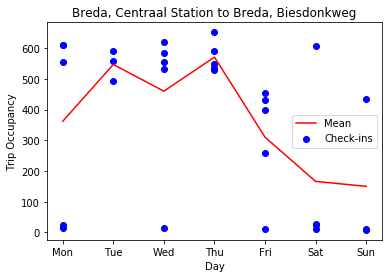

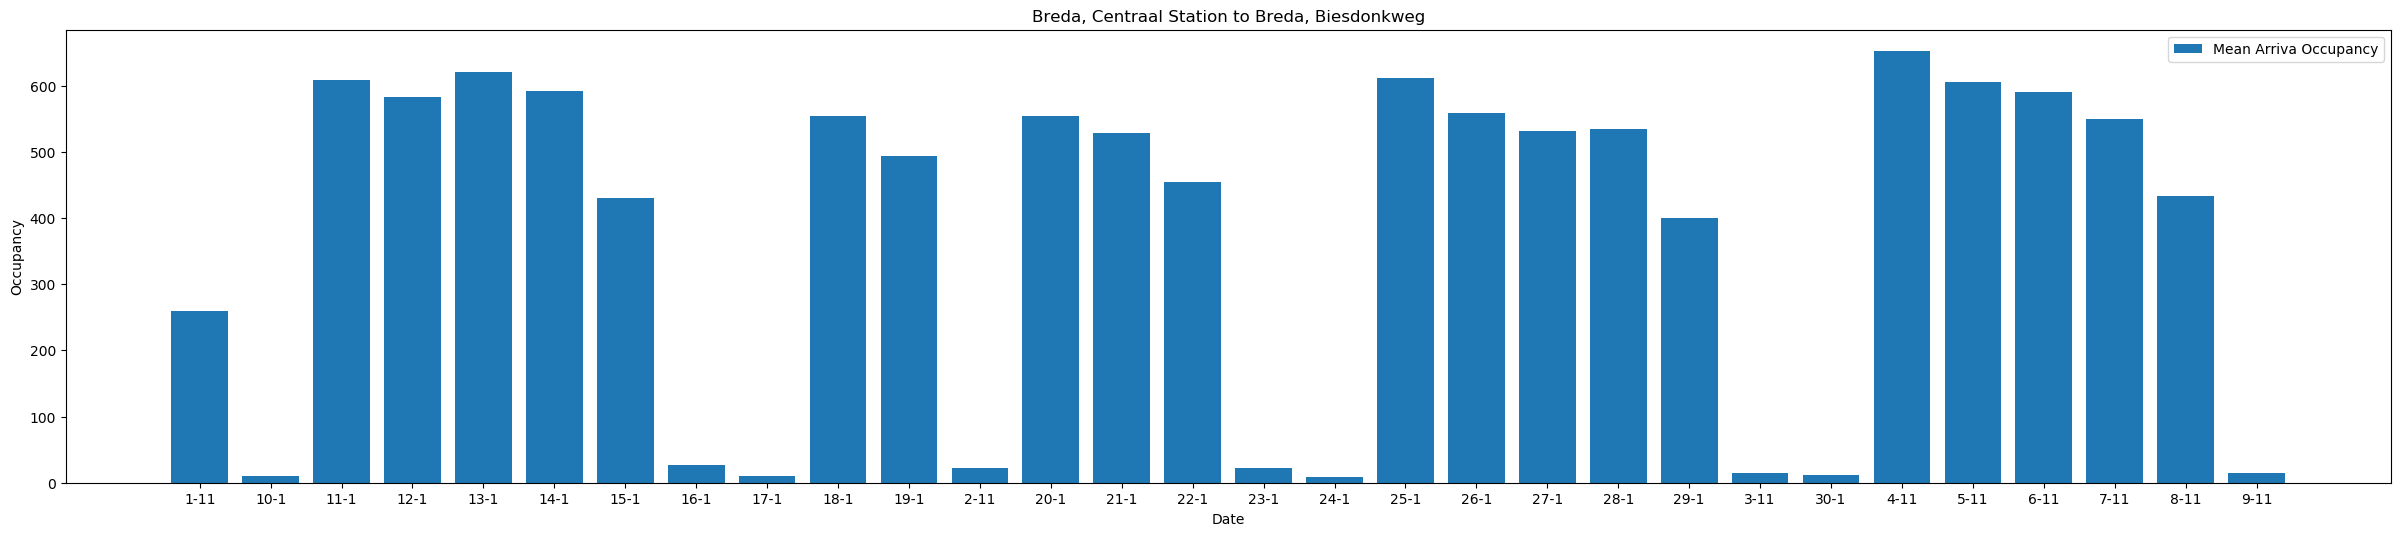

In [95]:
plot_trip_byweekday(stops[4],stops[6]),plot_trip_bydate(stops[4],stops[6])

In [62]:
len(arriva_cleaned['Destination Station'].unique())

1825

In [2]:
import pandas as pd
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor

#pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer


In [681]:
arriva_cleaned = pd.read_pickle("C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\bus data\\arriva_cleaned")
y = arriva_cleaned[['Totaal']]
X = arriva_cleaned[['Day_num','Source Station','Destination Station']]
X_s, _ , y_s, _ = train_test_split(X,y,train_size=0.05,shuffle=True,random_state=1)
categorical_features = ['Day_num','Source Station','Destination Station']
numerical_features = []

In [684]:
#define regressor pipeline function
def regressor_pipeline(estimator):
    
    # Creating a pipeline with one-hot-encoder for categorical data 
    categoric_transformer = make_pipeline(OneHotEncoder(sparse=False,handle_unknown='ignore'))

    # Creating a pipeline with mean imputer for numerical data 
    #numeric_transformer =  make_pipeline(StandardScaler())  
    
    # Combining both pipelines such that each pipeline works on the columns it was meant for
    preprocessor = make_column_transformer((categoric_transformer,categorical_features)
     )

    # Return the complete pipeline containing preprocessing-piepline and the estimator/classifier
    return Pipeline(steps = [('prep',preprocessor),('est',estimator)])


In [686]:
# define 4 regression models to evaluate
models = {'linear_regressor': regressor_pipeline(LinearRegression(n_jobs=-1)).fit(X_s,y_s) ,
            'neural_net_regressor': regressor_pipeline(MLPRegressor(random_state=1)).fit(X_s,y_s),
            #'svm_regressor': regressor_pipeline(SVR()).fit(X_s,y_s),
            'rf_regressor': regressor_pipeline(RandomForestRegressor(n_estimators=500,random_state=1)).fit(X_s,y_s)}


results = {'linear_regressor':[],
                'neural_net_regressor':[],
                #'svm_regressor':[],
                'rf_regressor':[] 
          }



In [ ]:
for (model_name,model_pipe) in models.items():
    #index=0
    for metric in ['neg_mean_absolute_error','neg_mean_squared_error','r2']:
        
        results[model_name].append(np.mean(cross_validate(model_pipe,X, y, scoring=metric,cv=ShuffleSplit(n_splits=3,random_state=1),    return_train_score=False)['test_score']))  
        #index += 1
#res = pd.DataFrame(index=['neg_mean_absolute_error','neg_mean_squared_error','r2'],columns=results.keys).from_dict(data=results)
res = pd.DataFrame(data=results)
res['metrics'] = pd.Series(['mae','mse','r2'])

print(res)


In [7]:
bus_request_counts = bus_9292[['Startdatum_lag','Starttijd_lag','Haltenaam_van_rit','Haltenaam_naar_rit']].groupby(['Startdatum_lag','Haltenaam_van_rit','Haltenaam_naar_rit']).count()
bus_request_counts.columns = pd.Index(['Request Counts'])
bus_request_counts.reset_index(inplace=True)

In [8]:
bus_request_counts.insert(loc=1,column='Day_num',value=pd.Series(pd.DatetimeIndex(bus_request_counts['Startdatum_lag'])).dt.dayofweek)
bus_request_counts.columns = ['Exploitatiedatum','Day_num','Source Station','Destination Station','Totaal']

In [113]:
bus_request_counts[(bus_request_counts['Source Station'].str.contains('Bre'))&(bus_request_counts['Source Station'].str.contains('Hoges'))]

,Exploitatiedatum,Day_num,Source Station,Destination Station,Totaal
264,2019-10-31,3,"Hogeschoollaan , Breda","station , Breda",10
1980,2019-11-01,4,"Hogeschoollaan , Breda","station , Breda",119
5966,2019-11-02,5,"Hogeschoollaan , Breda","station , Breda",7
9270,2019-11-03,6,"Hogeschoollaan , Breda","station , Breda",9
12838,2019-11-04,0,"Hogeschoollaan , Breda","station , Breda",190
...,...,...,...,...,...
133263,2019-12-02,0,"Hogeschoollaan , Breda","station , Breda",6
133939,2019-12-03,1,"Hogeschoollaan , Breda","station , Breda",1
134321,2019-12-04,2,"Hogeschoollaan , Breda","station , Breda",5
134605,2019-12-05,3,"Hogeschoollaan , Breda","station , Breda",3


(None, None)

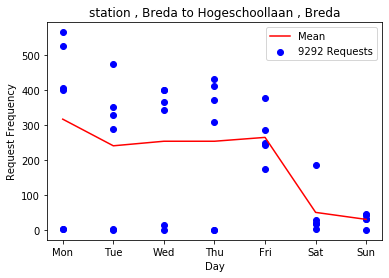

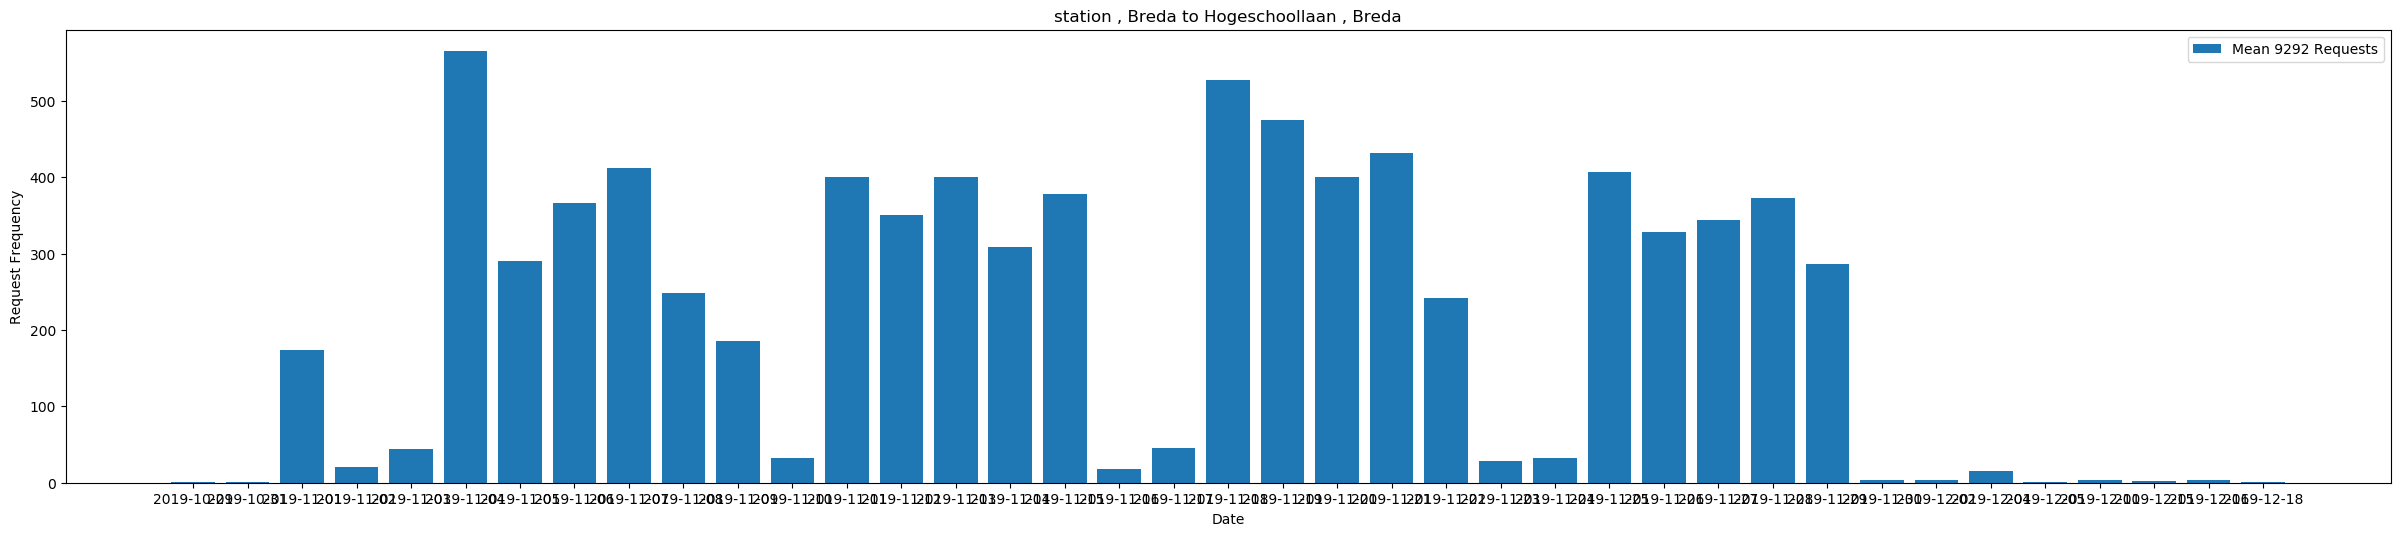

In [114]:
plot_trip_byweekday_9292('station , Breda','Hogeschoollaan , Breda'), plot_trip_bydate_9292('station , Breda','Hogeschoollaan , Breda')

(None, None)

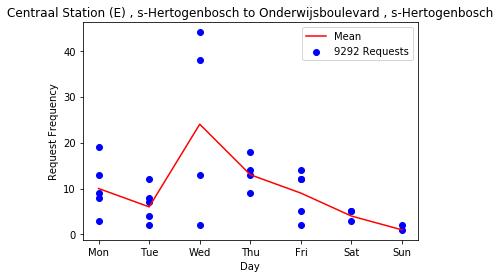

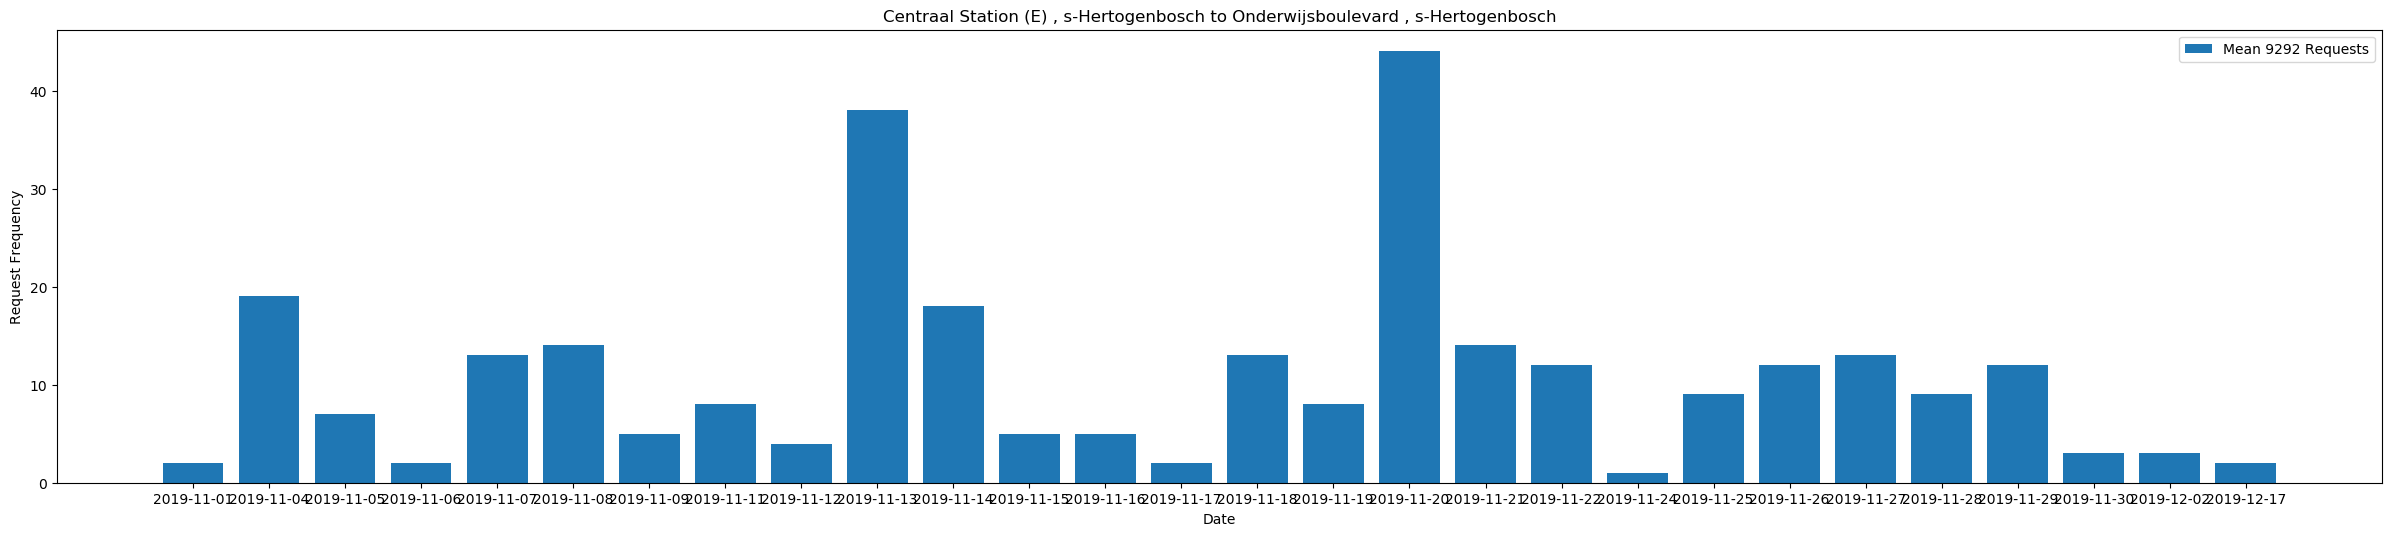

In [98]:
plot_trip_byweekday_9292('Centraal Station (E) , s-Hertogenbosch','Onderwijsboulevard , s-Hertogenbosch'), plot_trip_bydate_9292('Centraal Station (E) , s-Hertogenbosch','Onderwijsboulevard , s-Hertogenbosch')

(None, None)

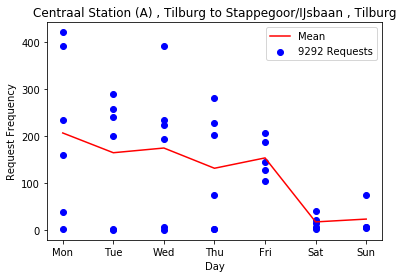

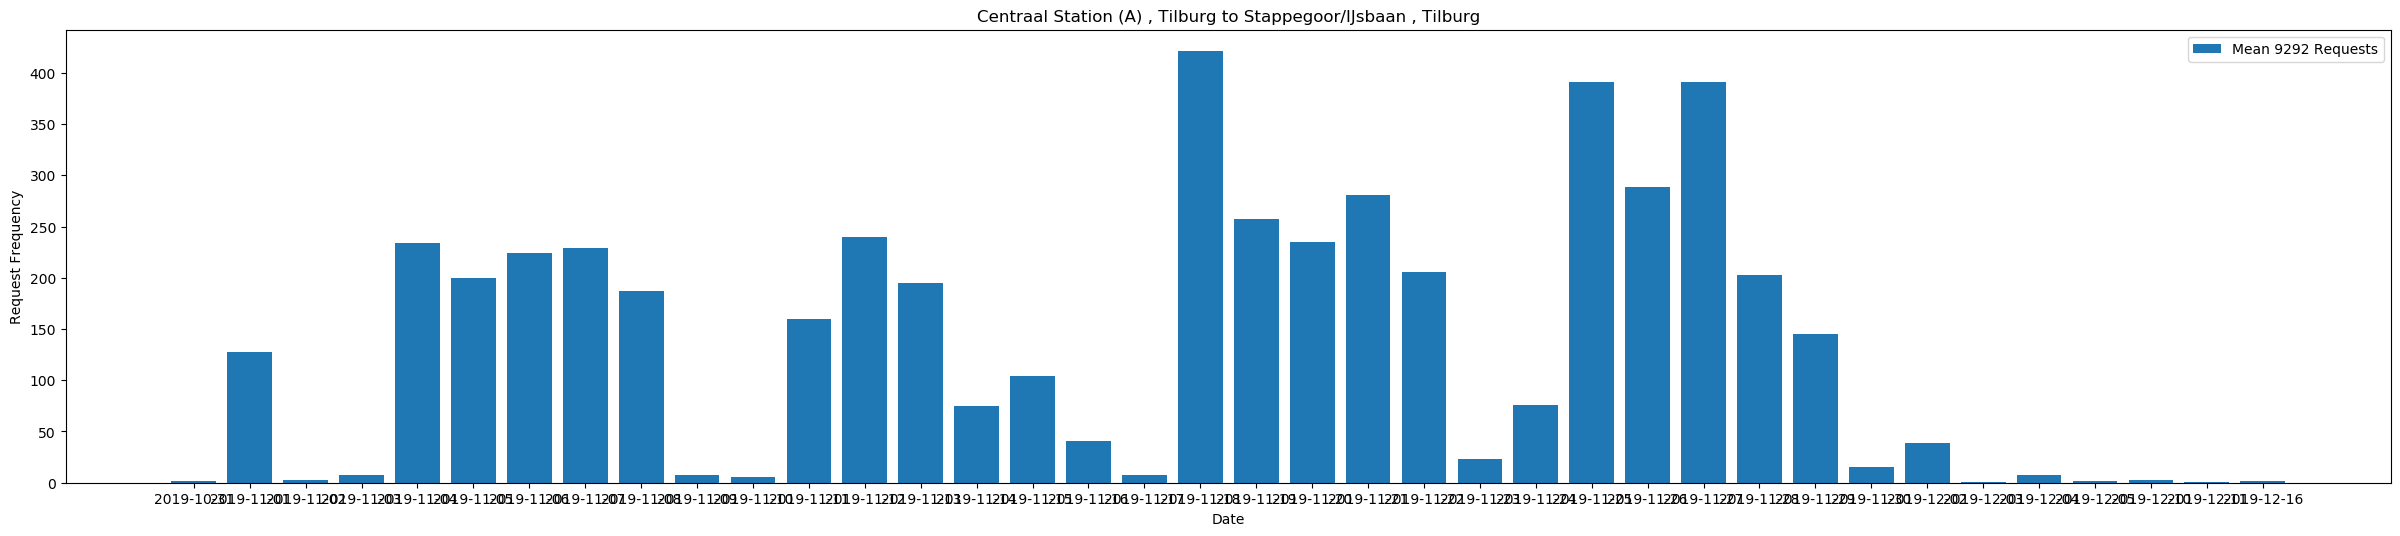

In [87]:
plot_trip_byweekday_9292('Centraal Station (A) , Tilburg','Stappegoor/IJsbaan , Tilburg'), plot_trip_bydate_9292('Centraal Station (A) , Tilburg','Stappegoor/IJsbaan , Tilburg')

In [ ]:
	
trip_data = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)]

In [85]:
def plot_trip_byweekday_9292(source,destination):

    trip_data = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)]
    #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination)    
    agg_trip = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)].groupby(['Day_num']).mean()
    agg_trip = agg_trip.reset_index()


    plt.scatter([elem for elem in trip_data['Day_num'].astype(int).values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b',label='9292 Requests')
    
    plt.plot([elem for elem in agg_trip['Day_num'].astype(int).values],[elem for elem in agg_trip['Totaal'].astype(int).values],c='r',label='Mean')
    
    plt.xticks(agg_trip['Day_num'],[elem for elem in ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']])
    plt.xlabel('Day')
    plt.ylabel('Request Frequency')
    plt.legend(loc='best')
    plt.title(source+' to '+destination)



def plot_trip_bydate_9292(source,destination):

    trip_data = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)]
    #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination
    agg_trip = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)].groupby(['Exploitatiedatum']).mean()
    agg_trip = agg_trip.reset_index()

    plt.figure(num=None, figsize=(30, 6), dpi=100, facecolor='w', edgecolor='k')
    #plt.scatter([elem for elem in trip_data['Exploitatiedatum'].values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b')
    plt.bar([elem for elem in agg_trip['Exploitatiedatum'].values],[elem for elem in agg_trip['Totaal'].astype(int).values],label='Mean 9292 Requests')

    plt.xticks(agg_trip['Exploitatiedatum'],[elem for elem in agg_trip['Exploitatiedatum']])
    plt.xlabel('Date')
    plt.ylabel('Request Frequency')

    plt.legend(loc='best')
    plt.title(source+' to '+destination)    

In [115]:
arriva_cleaned.shape

(453700, 6)

In [116]:
bus_request_counts.shape

(138463, 5)

In [637]:
df_haltes = pd.DataFrame(   
                            set(bus_request_counts.Haltenaam_van_rit.unique())
                            .union(set(bus_request_counts.Haltenaam_naar_rit.unique()))
                            )

df_haltes.columns = ['9292_halte']
df_haltes

,9292_halte
0,"Arnold Kaldenbachstraat , Zutphen"
1,"Moskeeplein , Utrecht"
2,"Heiakker , Deurne"
3,"Zweins , Zweins"
4,"De Druif , Klundert"
...,...
11171,"Spieringweg , Cruquius"
11172,"De Savornin Lohmansingel , Gouda"
11173,"Vaarselstraat , Someren"
11174,"Het Slyk , Vianen"


In [663]:
[str(arriva_haltes[ (arriva_haltes['CHB_quayNaam'].str.contains(elem.split()[0]) ) &
                (arriva_haltes['CHB_plaats'].str.contains(elem.split()[-1]) )
              ]['CHB_Haltenaam'].unique())[2:-2] for elem in df_haltes['9292_halte']]



#[e[-1] for e in elem.split() ]

error: missing ), unterminated subpattern at position 11

In [662]:
str(arriva_haltes[ (arriva_haltes['CHB_quayNaam'].str.contains('Centraal Station') ) &
                (arriva_haltes['CHB_plaats'].str.contains('Tilburg') )
              ]['CHB_Haltenaam'].unique())[2:-2]

'Tilburg, Centraal Station'

,halte
0,"Arnold Kaldenbachstraat , Zutphen"
1,"Moskeeplein , Utrecht"
2,"Heiakker , Deurne"
3,"Zweins , Zweins"
4,"De Druif , Klundert"
...,...
11171,"Spieringweg , Cruquius"
11172,"De Savornin Lohmansingel , Gouda"
11173,"Vaarselstraat , Someren"
11174,"Het Slyk , Vianen"


In [176]:
arriva_haltes['CHB_Haltenaam']=arriva_haltes['CHB_Haltenaam'].str.lower()

In [107]:
arriva_haltes[arriva_haltes['CHB_plaats'].str.contains('airport')]

,Arriva_FARESTOPSHORTDESCRIPTION,CHB_Haltenaam,afstand,Arriva_CODE,Arriva_FARESTOPSHORTNAME,Arriva_IDFVFARESTOP,Arriva_WGS_COORD_LAT,Arriva_WGS_COORD_LON,CHB_quayNaam,CHB_straat,CHB_plaats


In [190]:
df_haltes[df_haltes['halte'].str.contains('Tilburg')]

,halte
198,"Alpenlaan , Tilburg"
208,"Oudenstaart , Tilburg"
264,"Hoevensekanaaldijk , Tilburg"
273,"Prof.v. Buchemlaan , Tilburg"
315,"Kempenbaan , Tilburg"
...,...
10950,"Arriva , Tilburg"
11024,"Lage Witsiebaan , Tilburg"
11065,"Lourdesstraat , Tilburg"
11086,"Westerpark , Tilburg"


In [ ]:
### MVP: 
# Given the day of the week, and the source and destination stop, product will predict expected bus occupancy for your trip.


### Target Variable : Bus Occupancy

### Input Variables:
### Day (Constructed from Date)
### Hour 
### Source Stop
### Destination Stop
### 


### MVP: 
## To Generate Value from 9292 request_advice data (+ arriva passenger data)


In [18]:
all_unique_source_stops = np.unique(bus_passenger_data['Station Herkomst'])

In [19]:
all_unique_stops = np.unique(bus_passenger_data['Station'])